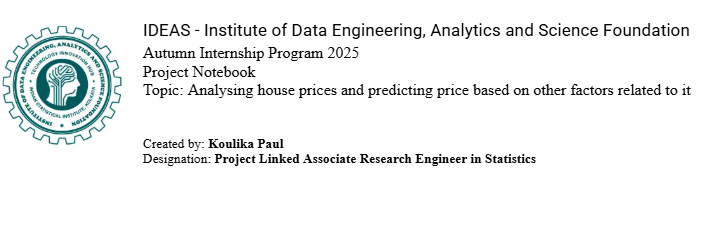

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
house_data= pd.read_csv('/content/drive/MyDrive/ISI_Kolkata_Internship/DataCleaningAndRegression/house_price_india.csv')
house_data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


***Insert synthetic missing value***

In [4]:
house_data_missing= house_data.copy()
## each column missing values are inserted, 20% sample of each column is been drawn and its index is noted to replace those rows with nan
for i in house_data_missing.columns:
  house_data_missing[i].loc[house_data_missing[i].sample(frac=0.2).index]= np.nan
house_data_missing

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6.762810e+09,42491.0,5.0,2.50,3650.0,9050.0,2.0,NaN,4.0,5.0,...,1921.0,0.0,NaN,52.8645,NaN,2880.0,5400.0,2.0,NaN,2380000.0
1,NaN,42491.0,4.0,2.50,2920.0,NaN,NaN,0.0,0.0,5.0,...,1909.0,0.0,122004.0,NaN,NaN,2470.0,4000.0,2.0,51.0,1400000.0
2,NaN,42491.0,5.0,2.75,2910.0,9480.0,NaN,0.0,0.0,3.0,...,NaN,0.0,122004.0,NaN,-114.468,2940.0,6600.0,1.0,NaN,NaN
3,NaN,42491.0,4.0,NaN,NaN,42998.0,NaN,NaN,0.0,3.0,...,2001.0,NaN,122005.0,52.9532,-114.321,3350.0,42847.0,3.0,76.0,838000.0
4,NaN,NaN,NaN,2.00,2710.0,4500.0,1.5,0.0,0.0,NaN,...,1929.0,0.0,122006.0,52.9047,-114.485,2060.0,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6.762830e+09,42734.0,2.0,1.50,NaN,20000.0,1.0,0.0,NaN,4.0,...,1957.0,0.0,122066.0,52.6191,-114.472,2250.0,NaN,3.0,76.0,221700.0
14616,6.762830e+09,42734.0,3.0,2.00,1680.0,7000.0,1.5,0.0,0.0,4.0,...,NaN,0.0,NaN,52.5075,-114.393,NaN,7480.0,3.0,59.0,219200.0
14617,NaN,NaN,2.0,1.00,1070.0,6120.0,1.0,NaN,NaN,3.0,...,1962.0,0.0,122056.0,52.7289,-114.507,1130.0,6120.0,2.0,64.0,209000.0
14618,NaN,42734.0,4.0,1.00,1030.0,6621.0,1.0,0.0,0.0,4.0,...,1955.0,0.0,122042.0,NaN,-114.411,NaN,6631.0,3.0,54.0,205000.0


**Q1. Try inserting a missing value to a specific column of your choice**

In [5]:
# Insert a missing value into a specific column (e.g., 'number of bedrooms')
house_data_missing.loc[0, 'number of bedrooms'] = np.nan
display(house_data_missing.head())

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6.762810e+09,42491.0,NaN,2.50,3650.0,9050.0,2.0,NaN,4.0,5.0,...,1921.0,0.0,NaN,52.8645,NaN,2880.0,5400.0,2.0,NaN,2380000.0
1,NaN,42491.0,4.0,2.50,2920.0,NaN,NaN,0.0,0.0,5.0,...,1909.0,0.0,122004.0,NaN,NaN,2470.0,4000.0,2.0,51.0,1400000.0
2,NaN,42491.0,5.0,2.75,2910.0,9480.0,NaN,0.0,0.0,3.0,...,NaN,0.0,122004.0,NaN,-114.468,2940.0,6600.0,1.0,NaN,NaN
3,NaN,42491.0,4.0,NaN,NaN,42998.0,NaN,NaN,0.0,3.0,...,2001.0,NaN,122005.0,52.9532,-114.321,3350.0,42847.0,3.0,76.0,838000.0
4,NaN,NaN,NaN,2.00,2710.0,4500.0,1.5,0.0,0.0,NaN,...,1929.0,0.0,122006.0,52.9047,-114.485,2060.0,NaN,1.0,NaN,NaN


***Information about the data***

In [6]:
house_data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     11696 non-null  float64
 1   Date                                   11696 non-null  float64
 2   number of bedrooms                     11695 non-null  float64
 3   number of bathrooms                    11696 non-null  float64
 4   living area                            11696 non-null  float64
 5   lot area                               11696 non-null  float64
 6   number of floors                       11696 non-null  float64
 7   waterfront present                     11696 non-null  float64
 8   number of views                        11696 non-null  float64
 9   condition of the house                 11696 non-null  float64
 10  grade of the house                     11696 non-null  float64
 11  Ar

***Dropping columns***

In [7]:
## Date column wrong input in the data so we drop it and keep inside the actual data
house_data_missing.drop(['Date','Longitude','Renovation Year','Postal Code', 'Lattitude','living_area_renov', 'lot_area_renov'],axis=1,inplace=True)

In [8]:
house_data_missing.columns

Index(['id', 'number of bedrooms', 'number of bathrooms', 'living area',
       'lot area', 'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Number of schools nearby', 'Distance from the airport',
       'Price'],
      dtype='object')

**Q2. Show statistics about the data of only numeric columns**

In [9]:
display(house_data_missing.describe())

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Number of schools nearby,Distance from the airport,Price
count,1.169600e+04,11695.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,1.169600e+04
mean,6.762821e+09,3.378794,2.122905,2094.089176,15171.101659,1.500641,0.007524,0.237175,3.427155,7.679463,1802.240766,293.307712,1970.941775,2.014107,64.973324,5.389194e+05
std,6.228312e+03,0.944317,0.761106,926.158120,37663.830918,0.540632,0.086417,0.774325,0.662689,1.174814,831.061606,447.147072,29.554054,0.815239,8.930245,3.713850e+05
min,6.762810e+09,1.000000,0.500000,380.000000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,3.000000,1.750000,1440.000000,5004.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,3.000000,2.250000,1930.000000,7611.500000,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,4.000000,2.500000,2560.000000,10800.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,562.500000,1997.000000,3.000000,73.000000,6.420000e+05
max,6.762832e+09,33.000000,8.000000,13540.000000,982998.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,3.000000,80.000000,7.700000e+06


***Distribution of price in the dataset***

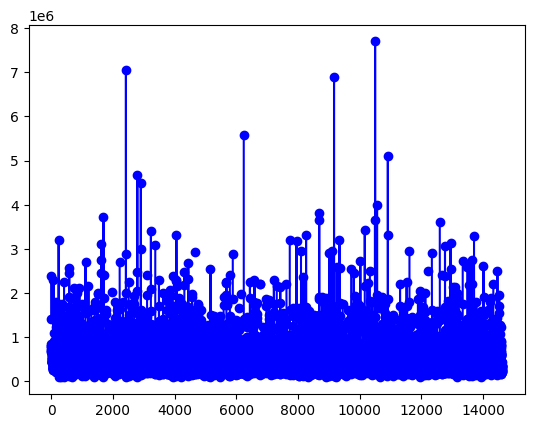

In [10]:
plt.plot(house_data_missing.index,house_data_missing['Price'],marker='o',linestyle='-',color='b', label="Distribution of Price for all houses")
plt.show()

**Q3. Find the distribution of area (total area) of houses (use Seaborn distplot)**

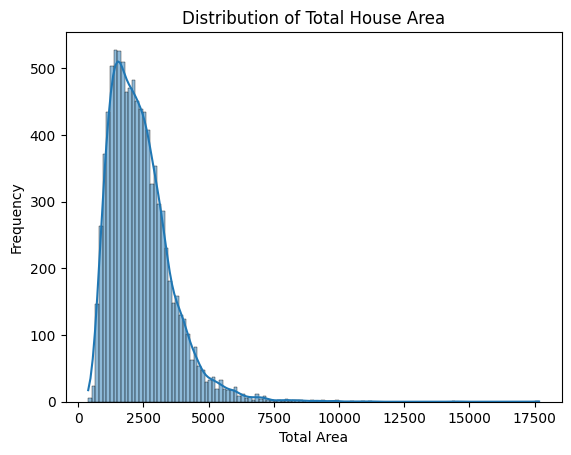

In [11]:
import seaborn as sns

house_data_missing['total area'] = house_data_missing['living area'] + house_data_missing['Area of the basement']

sns.histplot(house_data_missing['total area'].dropna(), kde=True)
plt.title('Distribution of Total House Area')
plt.xlabel('Total Area')
plt.ylabel('Frequency')
plt.show()

***Checking for duplicate rows***

In [12]:
house_data_missing.duplicated().sum()

np.int64(0)

***Checking missing values***

In [13]:
house_data_missing.isna().sum()

,0
id,2924
number of bedrooms,2925
number of bathrooms,2924
living area,2924
lot area,2924
number of floors,2924
waterfront present,2924
number of views,2924
condition of the house,2924
grade of the house,2924


***Handling missing values***

***Technique 1: Remove missing value rows***

In [14]:
house_data_missing1= house_data_missing.dropna()
house_data_missing1.isna().sum()

,0
id,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0
grade of the house,0


***Technique 2: Replace with mean***

In [15]:
house_data_missing2= house_data_missing.copy()
for cols in house_data_missing2.columns:
  house_data_missing2[cols]= house_data_missing2[cols].fillna(np.mean(house_data_missing2[cols]))
house_data_missing2.isna().sum()

,0
id,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0
grade of the house,0


**Q4. Try replacing the missing values with the standard deviation of each column**

In [16]:
house_data_missing4 = house_data_missing.copy()
for col in house_data_missing4.columns:
  house_data_missing4[col] = house_data_missing4[col].fillna(house_data_missing4[col].std())

display(house_data_missing4.isna().sum())

,0
id,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0
grade of the house,0


***Technique 3: Interpolation***

In [17]:
house_data_missing3= house_data_missing.interpolate(method='linear')
house_data_missing2.isna().sum()

,0
id,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0
grade of the house,0


**Q5. Try replacing the missing values using interpolation with the polynomial method**

In [18]:
house_data_missing5 = house_data_missing.interpolate(method='polynomial', order=2)
display(house_data_missing5.isna().sum())

,0
id,0
number of bedrooms,1
number of bathrooms,0
living area,0
lot area,0
number of floors,1
waterfront present,1
number of views,0
condition of the house,0
grade of the house,0


***Technique 4: KNN imputation***

In [19]:
from sklearn.impute import KNNImputer
imputed_vals= KNNImputer(n_neighbors=5)
imputed_data= pd.DataFrame(imputed_vals.fit_transform(house_data_missing),columns= house_data_missing.columns)
imputed_data.isna().sum()

,0
id,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0
grade of the house,0


**Q6. Perform replacing missing values with KNN imputers on scaled data. Also, inverse the scaled data to get the original data.**


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()
house_data_scaled = scaler.fit_transform(house_data_missing)

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_scaled_data = imputer.fit_transform(house_data_scaled)

# Inverse transform to get original data
house_data_imputed_scaled = scaler.inverse_transform(imputed_scaled_data)
house_data_imputed_scaled = pd.DataFrame(house_data_imputed_scaled, columns=house_data_missing.columns)

display(house_data_imputed_scaled.isna().sum())

,0
id,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0
grade of the house,0


***Changing datatype***

In [21]:
imputed_data['Number of schools nearby']=imputed_data['Number of schools nearby'].astype('int')

***Find the number of houses having 3 schools nearby***

In [22]:
imputed_data.groupby('Number of schools nearby')['id'].count()

,id
Number of schools nearby,
1,5319
2,5326
3,3975


**Q7. Interpret the above result**

In [23]:
school_counts = imputed_data.groupby('Number of schools nearby')['id'].count()
print(f"Houses with 1 school nearby: {school_counts.get(1, 0)}")
print(f"Houses with 2 schools nearby: {school_counts.get(2, 0)}")
print(f"Houses with 3 schools nearby: {school_counts.get(3, 0)}")

Houses with 1 school nearby: 5319
Houses with 2 schools nearby: 5326
Houses with 3 schools nearby: 3975


***Correlation between all the features***

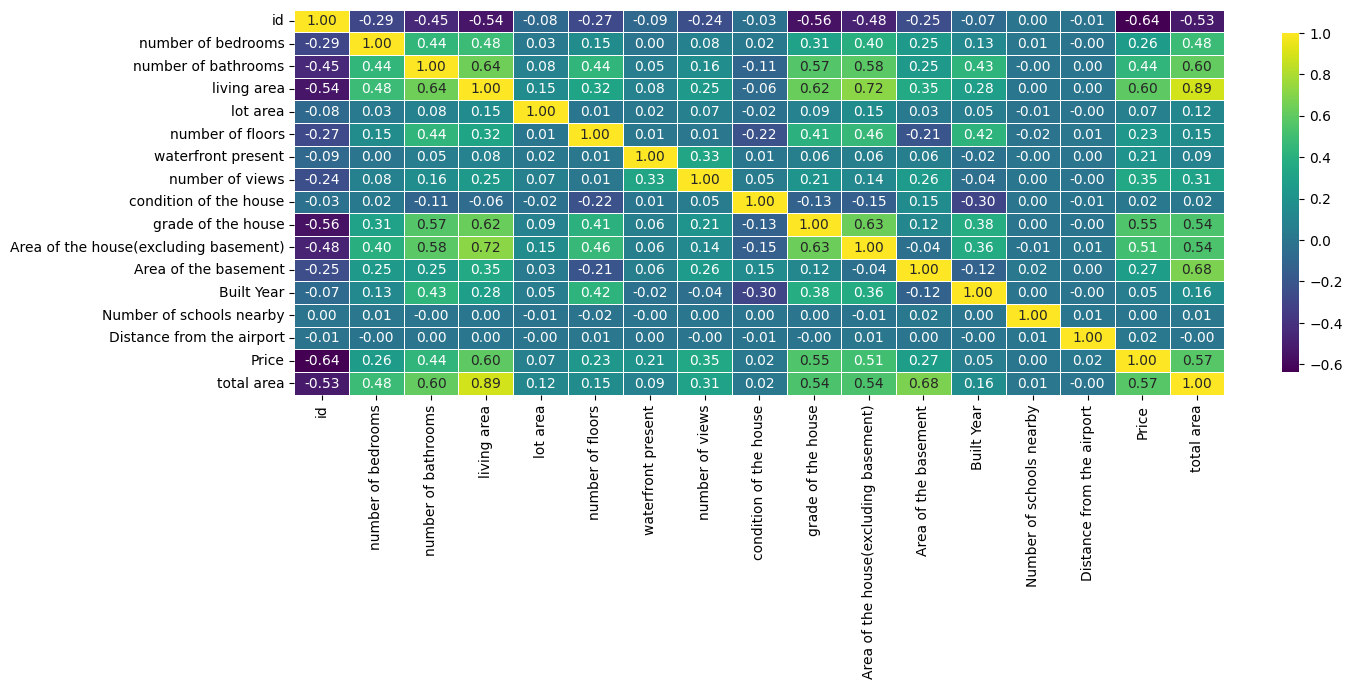

In [24]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(imputed_data.corr(),annot=True,fmt='0.2f',cmap='viridis',linewidths=0.5,
            cbar_kws={"shrink": 0.88})
plt.show()

**Q8. Find features that are highly correlated with the area of the house (excluding the basement)**

In [25]:
correlation_with_area = imputed_data.corr()['Area of the house(excluding basement)'].sort_values(ascending=False)

# Filter for features with correlation greater than 0.5 (excluding the feature itself)
highly_correlated_features = correlation_with_area[correlation_with_area > 0.5].drop('Area of the house(excluding basement)')

print("Features highly correlated with 'Area of the house(excluding basement)':\n")
display(highly_correlated_features)

Features highly correlated with 'Area of the house(excluding basement)':



,Area of the house(excluding basement)
living area,0.718174
grade of the house,0.632389
number of bathrooms,0.583557
total area,0.536053
Price,0.507505


***Find the distribution of each feature***

In [26]:
sns.pairplot(imputed_data)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Q9. Find the average price of houses having 3 schools nearby**

In [27]:
imputed_data.groupby('Number of schools nearby')['Price'].agg(np.mean)

,Price
Number of schools nearby,
1,534118.103365
2,525888.905670
3,538292.933233


**Q10. Find the average area of houses having 5 bedrooms**

In [28]:
average_area_5_bedrooms = imputed_data[imputed_data['number of bedrooms'] == 5]['total area'].mean()
print(f"The average total area of houses with 5 bedrooms is: {average_area_5_bedrooms:.2f}")

The average total area of houses with 5 bedrooms is: 3515.72


***Selecting the features for predicting***

In [29]:
features=[]
for cols in imputed_data.iloc[:,:-1].columns:
  if (imputed_data['Price'].corr(imputed_data[cols]))>0.50:
    features.append(cols)
print(features)

['living area', 'grade of the house', 'Area of the house(excluding basement)', 'Price']


In [30]:
X= imputed_data[features]
y= imputed_data.iloc[:,-1]

**Q11. Show the pairwise distribution of X and y**

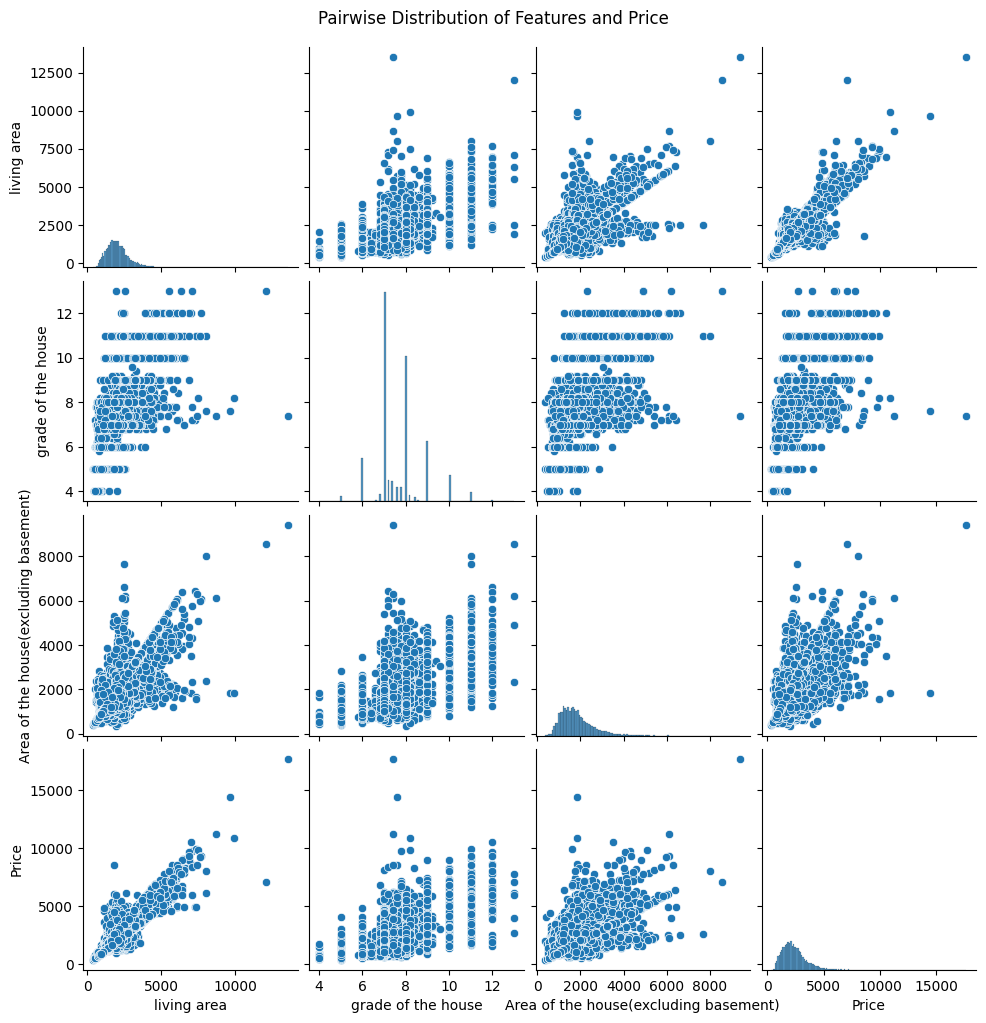

In [31]:
# Combine X and y for pairplot
data_for_pairplot = X.copy()
data_for_pairplot['Price'] = y

sns.pairplot(data_for_pairplot)
plt.suptitle('Pairwise Distribution of Features and Price', y=1.02)
plt.show()

***Splitting datasets into training and testing***

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=123)

**Q12. Split the data as 60% training and 40% testing**

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)   #40% test size converted to 0.4

***Fitting the linear regression model and predicting***

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

In [35]:
LR= LinearRegression()
LR_model= LR.fit(X_train,y_train)
y_pred= LR_model.predict(X_test)

***Evaluation***

In [36]:
MSE= mean_squared_error(y_test,y_pred)
R_square= r2_score(y_test,y_pred)

In [37]:
print(MSE)
print("==============")
print(R_square)

204769.46290364262
0.8346561982675835


**Q13. Try model building and predicting with some other dataset of your choice**

Importing California Housing dataset from sklearn dataset

In [38]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
california_housing_df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_housing_df['MedHouseVal'] = california_housing.target

display(california_housing_df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


from matplotlib import pyplot as plt
_df_0['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

Inserting Synthetic Value

In [39]:
house_data_missing= house_data.copy()
## each column missing values are inserted, 20% sample of each column is been drawn and its index is noted to replace those rows with nan
for i in house_data_missing.columns:
  house_data_missing[i].loc[house_data_missing[i].sample(frac=0.2).index]= np.nan
house_data_missing

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6.762810e+09,NaN,5.0,2.50,3650.0,9050.0,2.0,0.0,4.0,5.0,...,NaN,0.0,122003.0,52.8645,-114.557,NaN,NaN,NaN,58.0,NaN
1,6.762811e+09,NaN,NaN,2.50,2920.0,4000.0,1.5,0.0,0.0,NaN,...,1909.0,0.0,NaN,52.8878,-114.470,NaN,4000.0,2.0,51.0,1400000.0
2,6.762811e+09,42491.0,5.0,2.75,NaN,9480.0,1.5,0.0,0.0,3.0,...,1939.0,0.0,122004.0,52.8852,-114.468,2940.0,6600.0,1.0,53.0,1200000.0
3,6.762813e+09,NaN,4.0,NaN,3310.0,42998.0,2.0,0.0,0.0,3.0,...,2001.0,0.0,122005.0,52.9532,-114.321,3350.0,NaN,NaN,76.0,838000.0
4,6.762813e+09,42491.0,3.0,2.00,2710.0,4500.0,1.5,0.0,NaN,4.0,...,1929.0,0.0,122006.0,52.9047,-114.485,2060.0,4500.0,1.0,51.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6.762830e+09,NaN,2.0,1.50,1556.0,20000.0,1.0,0.0,0.0,4.0,...,1957.0,0.0,122066.0,52.6191,-114.472,2250.0,17286.0,3.0,76.0,221700.0
14616,6.762830e+09,42734.0,3.0,NaN,1680.0,7000.0,1.5,NaN,NaN,4.0,...,1968.0,0.0,122072.0,52.5075,-114.393,1540.0,7480.0,NaN,59.0,219200.0
14617,6.762831e+09,NaN,2.0,1.00,1070.0,6120.0,1.0,0.0,0.0,3.0,...,1962.0,0.0,122056.0,52.7289,-114.507,1130.0,NaN,2.0,64.0,NaN
14618,6.762831e+09,42734.0,NaN,1.00,NaN,NaN,1.0,0.0,0.0,4.0,...,1955.0,0.0,122042.0,NaN,NaN,1420.0,6631.0,3.0,54.0,205000.0


Inserting missing value in specific location

In [40]:
# Insert a missing value into a specific column (e.g., 'number of bedrooms')
house_data_missing.loc[0, 'number of bedrooms'] = np.nan
display(house_data_missing.head())

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6.762810e+09,NaN,NaN,2.50,3650.0,9050.0,2.0,0.0,4.0,5.0,...,NaN,0.0,122003.0,52.8645,-114.557,NaN,NaN,NaN,58.0,NaN
1,6.762811e+09,NaN,NaN,2.50,2920.0,4000.0,1.5,0.0,0.0,NaN,...,1909.0,0.0,NaN,52.8878,-114.470,NaN,4000.0,2.0,51.0,1400000.0
2,6.762811e+09,42491.0,5.0,2.75,NaN,9480.0,1.5,0.0,0.0,3.0,...,1939.0,0.0,122004.0,52.8852,-114.468,2940.0,6600.0,1.0,53.0,1200000.0
3,6.762813e+09,NaN,4.0,NaN,3310.0,42998.0,2.0,0.0,0.0,3.0,...,2001.0,0.0,122005.0,52.9532,-114.321,3350.0,NaN,NaN,76.0,838000.0
4,6.762813e+09,42491.0,3.0,2.00,2710.0,4500.0,1.5,0.0,NaN,4.0,...,1929.0,0.0,122006.0,52.9047,-114.485,2060.0,4500.0,1.0,51.0,NaN


Information about the data

In [41]:
house_data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     11696 non-null  float64
 1   Date                                   11696 non-null  float64
 2   number of bedrooms                     11695 non-null  float64
 3   number of bathrooms                    11696 non-null  float64
 4   living area                            11696 non-null  float64
 5   lot area                               11696 non-null  float64
 6   number of floors                       11696 non-null  float64
 7   waterfront present                     11696 non-null  float64
 8   number of views                        11696 non-null  float64
 9   condition of the house                 11696 non-null  float64
 10  grade of the house                     11696 non-null  float64
 11  Ar

Dropping unnecessary columns

In [42]:
## Date column wrong input in the data so we drop it and keep inside the actual data
house_data_missing.drop(['Date','Longitude','Renovation Year','Postal Code', 'Lattitude','living_area_renov', 'lot_area_renov'],axis=1,inplace=True)

Numeric Columns Statistics

In [43]:
display(house_data_missing.describe())

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Number of schools nearby,Distance from the airport,Price
count,1.169600e+04,11695.000000,11696.000000,11696.000000,1.169600e+04,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,1.169600e+04
mean,6.762821e+09,3.378367,2.129980,2094.471272,1.521576e+04,1.504104,0.008293,0.231618,3.433140,7.678694,1803.846871,298.059251,1970.698444,2.010602,64.992904,5.373640e+05
std,6.248982e+03,0.949230,0.774229,923.552193,3.885845e+04,0.540439,0.090694,0.765298,0.666021,1.182476,830.125229,450.989230,29.482928,0.816288,8.958345,3.614438e+05
min,6.762810e+09,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,1.000000,50.000000,8.000000e+04
25%,6.762815e+09,3.000000,1.750000,1440.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,1.000000,57.000000,3.220000e+05
50%,6.762821e+09,3.000000,2.250000,1930.000000,7.637000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1974.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.500000,580.000000,1996.000000,3.000000,73.000000,6.434272e+05
max,6.762832e+09,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,3.000000,80.000000,7.700000e+06


Distribution of price in dataset

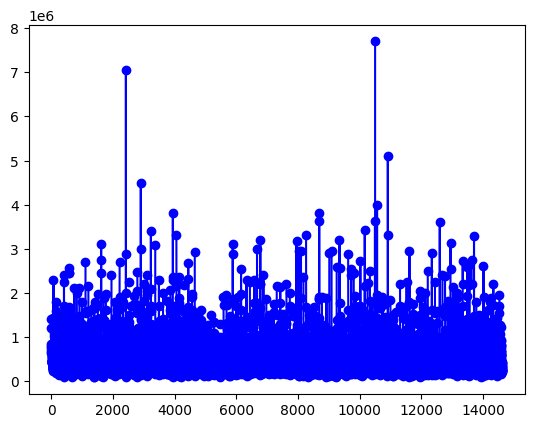

In [44]:
plt.plot(house_data_missing.index,house_data_missing['Price'],marker='o',linestyle='-',color='b', label="Distribution of Price for all houses")
plt.show()

 Finding the distribution of area (total area) of houses (use Seaborn distplot)

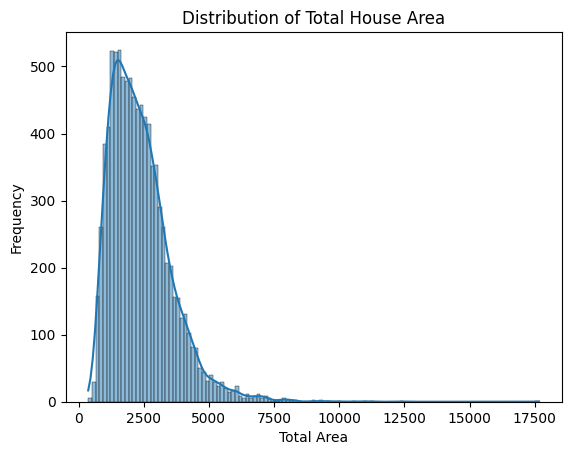

In [45]:
import seaborn as sns

house_data_missing['total area'] = house_data_missing['living area'] + house_data_missing['Area of the basement']

sns.histplot(house_data_missing['total area'].dropna(), kde=True)
plt.title('Distribution of Total House Area')
plt.xlabel('Total Area')
plt.ylabel('Frequency')
plt.show()

Checking for duplicate rows

In [46]:
house_data_missing.duplicated().sum()

np.int64(0)

Checking missing values

In [47]:
house_data_missing.isna().sum()

,0
id,2924
number of bedrooms,2925
number of bathrooms,2924
living area,2924
lot area,2924
number of floors,2924
waterfront present,2924
number of views,2924
condition of the house,2924
grade of the house,2924


Handling missing values: KNN imputation

In [48]:
from sklearn.impute import KNNImputer
imputed_vals= KNNImputer(n_neighbors=5)
imputed_data= pd.DataFrame(imputed_vals.fit_transform(house_data_missing),columns= house_data_missing.columns)
imputed_data.isna().sum()

,0
id,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0
grade of the house,0


Replacing missing values with KNN imputers on scaled data. Also, inversing the scaled data to get the original data.

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()
house_data_scaled = scaler.fit_transform(house_data_missing)

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_scaled_data = imputer.fit_transform(house_data_scaled)

# Inverse transform to get original data
house_data_imputed_scaled = scaler.inverse_transform(imputed_scaled_data)
house_data_imputed_scaled = pd.DataFrame(house_data_imputed_scaled, columns=house_data_missing.columns)

display(house_data_imputed_scaled.isna().sum())

,0
id,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0
grade of the house,0


Changing Datatype

In [50]:
imputed_data['Number of schools nearby']=imputed_data['Number of schools nearby'].astype('int')

Correletation between all the features


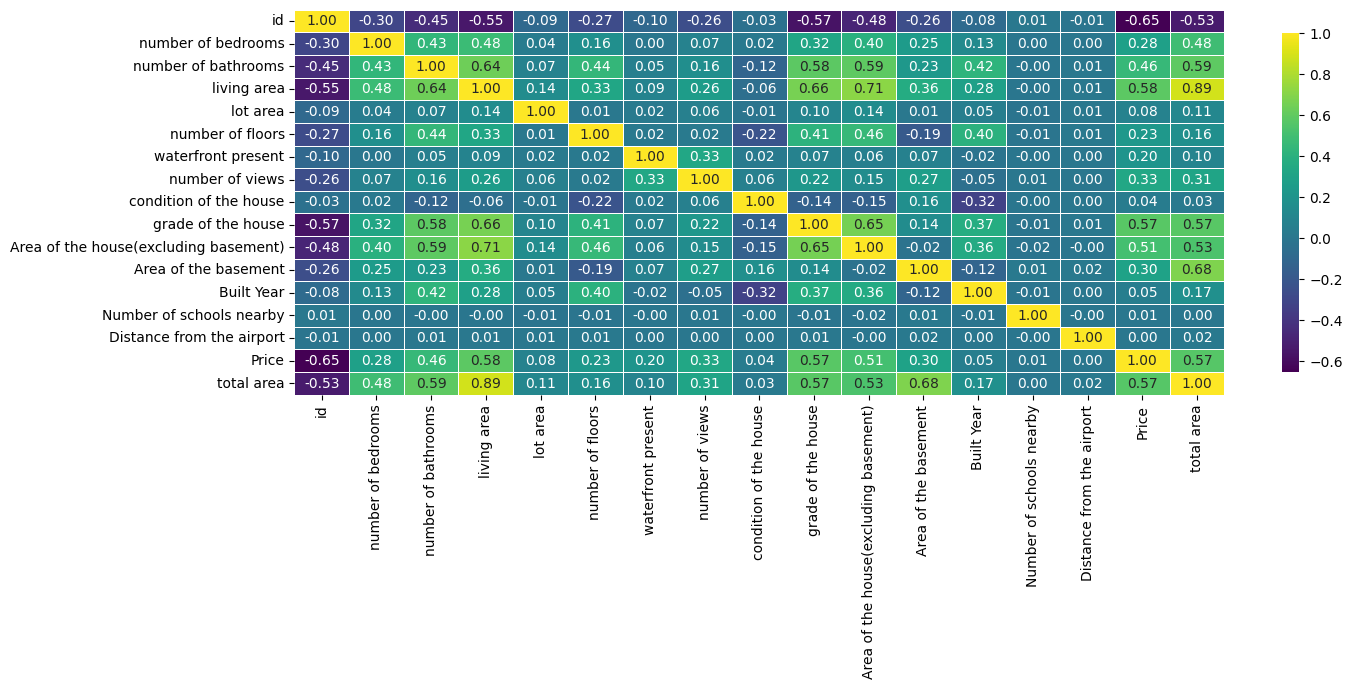

In [51]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(imputed_data.corr(),annot=True,fmt='0.2f',cmap='viridis',linewidths=0.5,
            cbar_kws={"shrink": 0.88})
plt.show()

Correlation between all the features

In [52]:
correlation_with_area = imputed_data.corr()['Area of the house(excluding basement)'].sort_values(ascending=False)

# Filter for features with correlation greater than 0.5 (excluding the feature itself)
highly_correlated_features = correlation_with_area[correlation_with_area > 0.5].drop('Area of the house(excluding basement)')

print("Features highly correlated with 'Area of the house(excluding basement)':\n")
display(highly_correlated_features)

Features highly correlated with 'Area of the house(excluding basement)':



,Area of the house(excluding basement)
living area,0.714318
grade of the house,0.653682
number of bathrooms,0.589205
total area,0.533145
Price,0.509719


Distribution of each feature

In [53]:
sns.pairplot(imputed_data)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Selecting the price feature for predicting

In [59]:
features=[]
for cols in imputed_data.iloc[:,:-1].columns:
  if (imputed_data['Price'].corr(imputed_data[cols]))>0.50:
    features.append(cols)
print(features)

['living area', 'grade of the house', 'Area of the house(excluding basement)', 'Price']


In [60]:
X= imputed_data[features]
y= imputed_data.iloc[:,-1]

Showing pairwise distribution of x and y

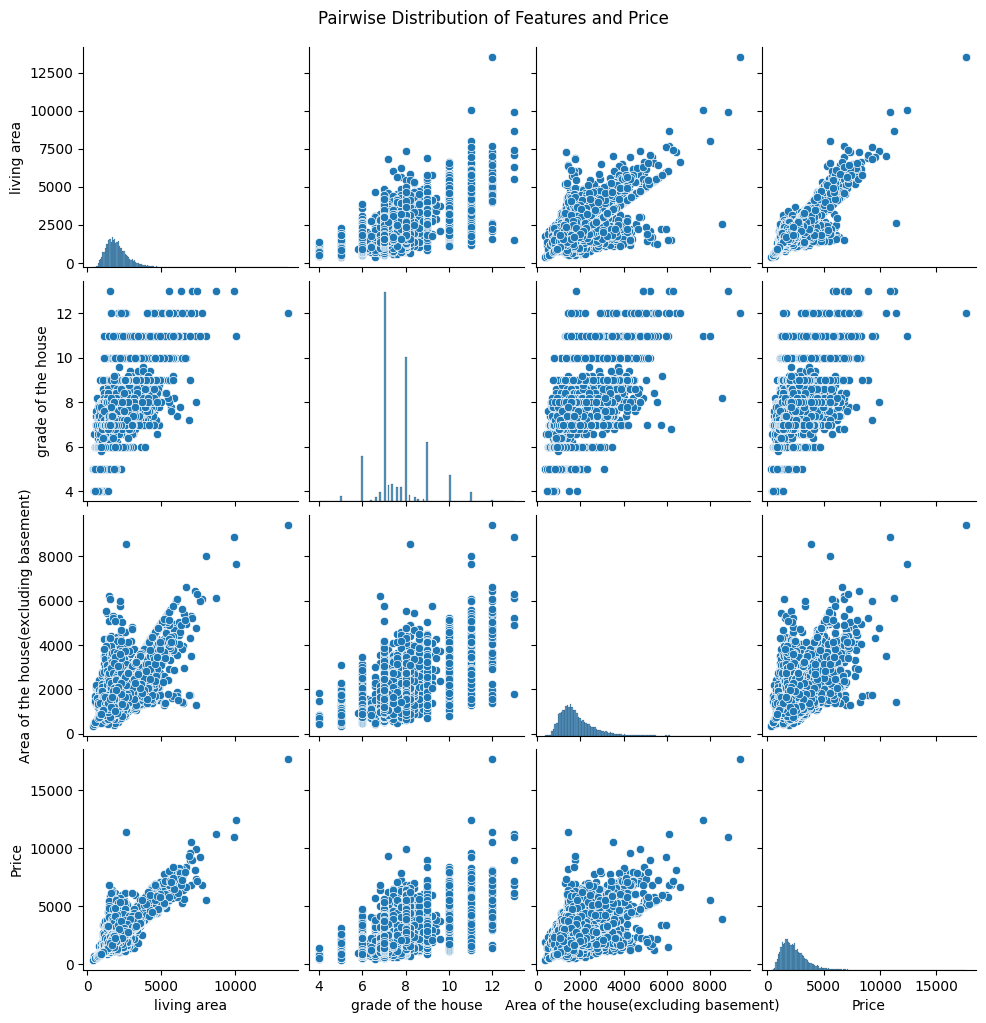

In [61]:
# Combine X and y for pairplot
data_for_pairplot = X.copy()
data_for_pairplot['Price'] = y

sns.pairplot(data_for_pairplot)
plt.suptitle('Pairwise Distribution of Features and Price', y=1.02)
plt.show()

Splitting datasets into training (60%) and testing (40%)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

Fitting the linear regression model and predicting

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

LR= LinearRegression()
LR_model= LR.fit(X_train,y_train)
y_pred= LR_model.predict(X_test)

Evaluating

In [64]:
MSE= mean_squared_error(y_test,y_pred)
R_square= r2_score(y_test,y_pred)

print(MSE)
print("==============")
print(R_square)

223407.46133838277
0.828170034050332
